In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {tv_projects[1]}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=tv_projects[1],
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

Animals in project visual_and_COT_data: ['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']
receiving incremental file list
ACV001.csv

sent 122,603 bytes  received 864,255 bytes  103,879.79 bytes/sec
total size is 311,199,984  speedup is 315.34
receiving incremental file list
ACV002.csv

sent 109,128 bytes  received 623,699 bytes  77,139.68 bytes/sec
total size is 246,595,781  speedup is 336.50
receiving incremental file list
ACV003.csv

sent 119,376 bytes  received 952,960 bytes  85,786.88 bytes/sec
total size is 295,689,225  speedup is 275.74
receiving incremental file list
ACV004.csv

sent 104,725 bytes  received 630,823 bytes  86,535.06 bytes/sec
total size is 227,434,879  speedup is 309.20
receiving incremental file list
ACV005.csv

sent 101,351 bytes  received 1,083,784 bytes  139,427.65 bytes/sec
total size is 215,559,716  speedup is 181.89
receiving incremental file list
ACV006.csv

sent 104,417 bytes  received 691,827 bytes  75

In [3]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_47555/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [4]:
df = dft.analyze_df(df)
print("Dataframe analyzed.")

Dataframe analyzed.


In [5]:
# selection of periods of stable behavior
# remove data from the 2nd to the 7th of July
df_clean = df[(df['date'] < '2025-07-02') | (df['date'] > '2025-07-07')]

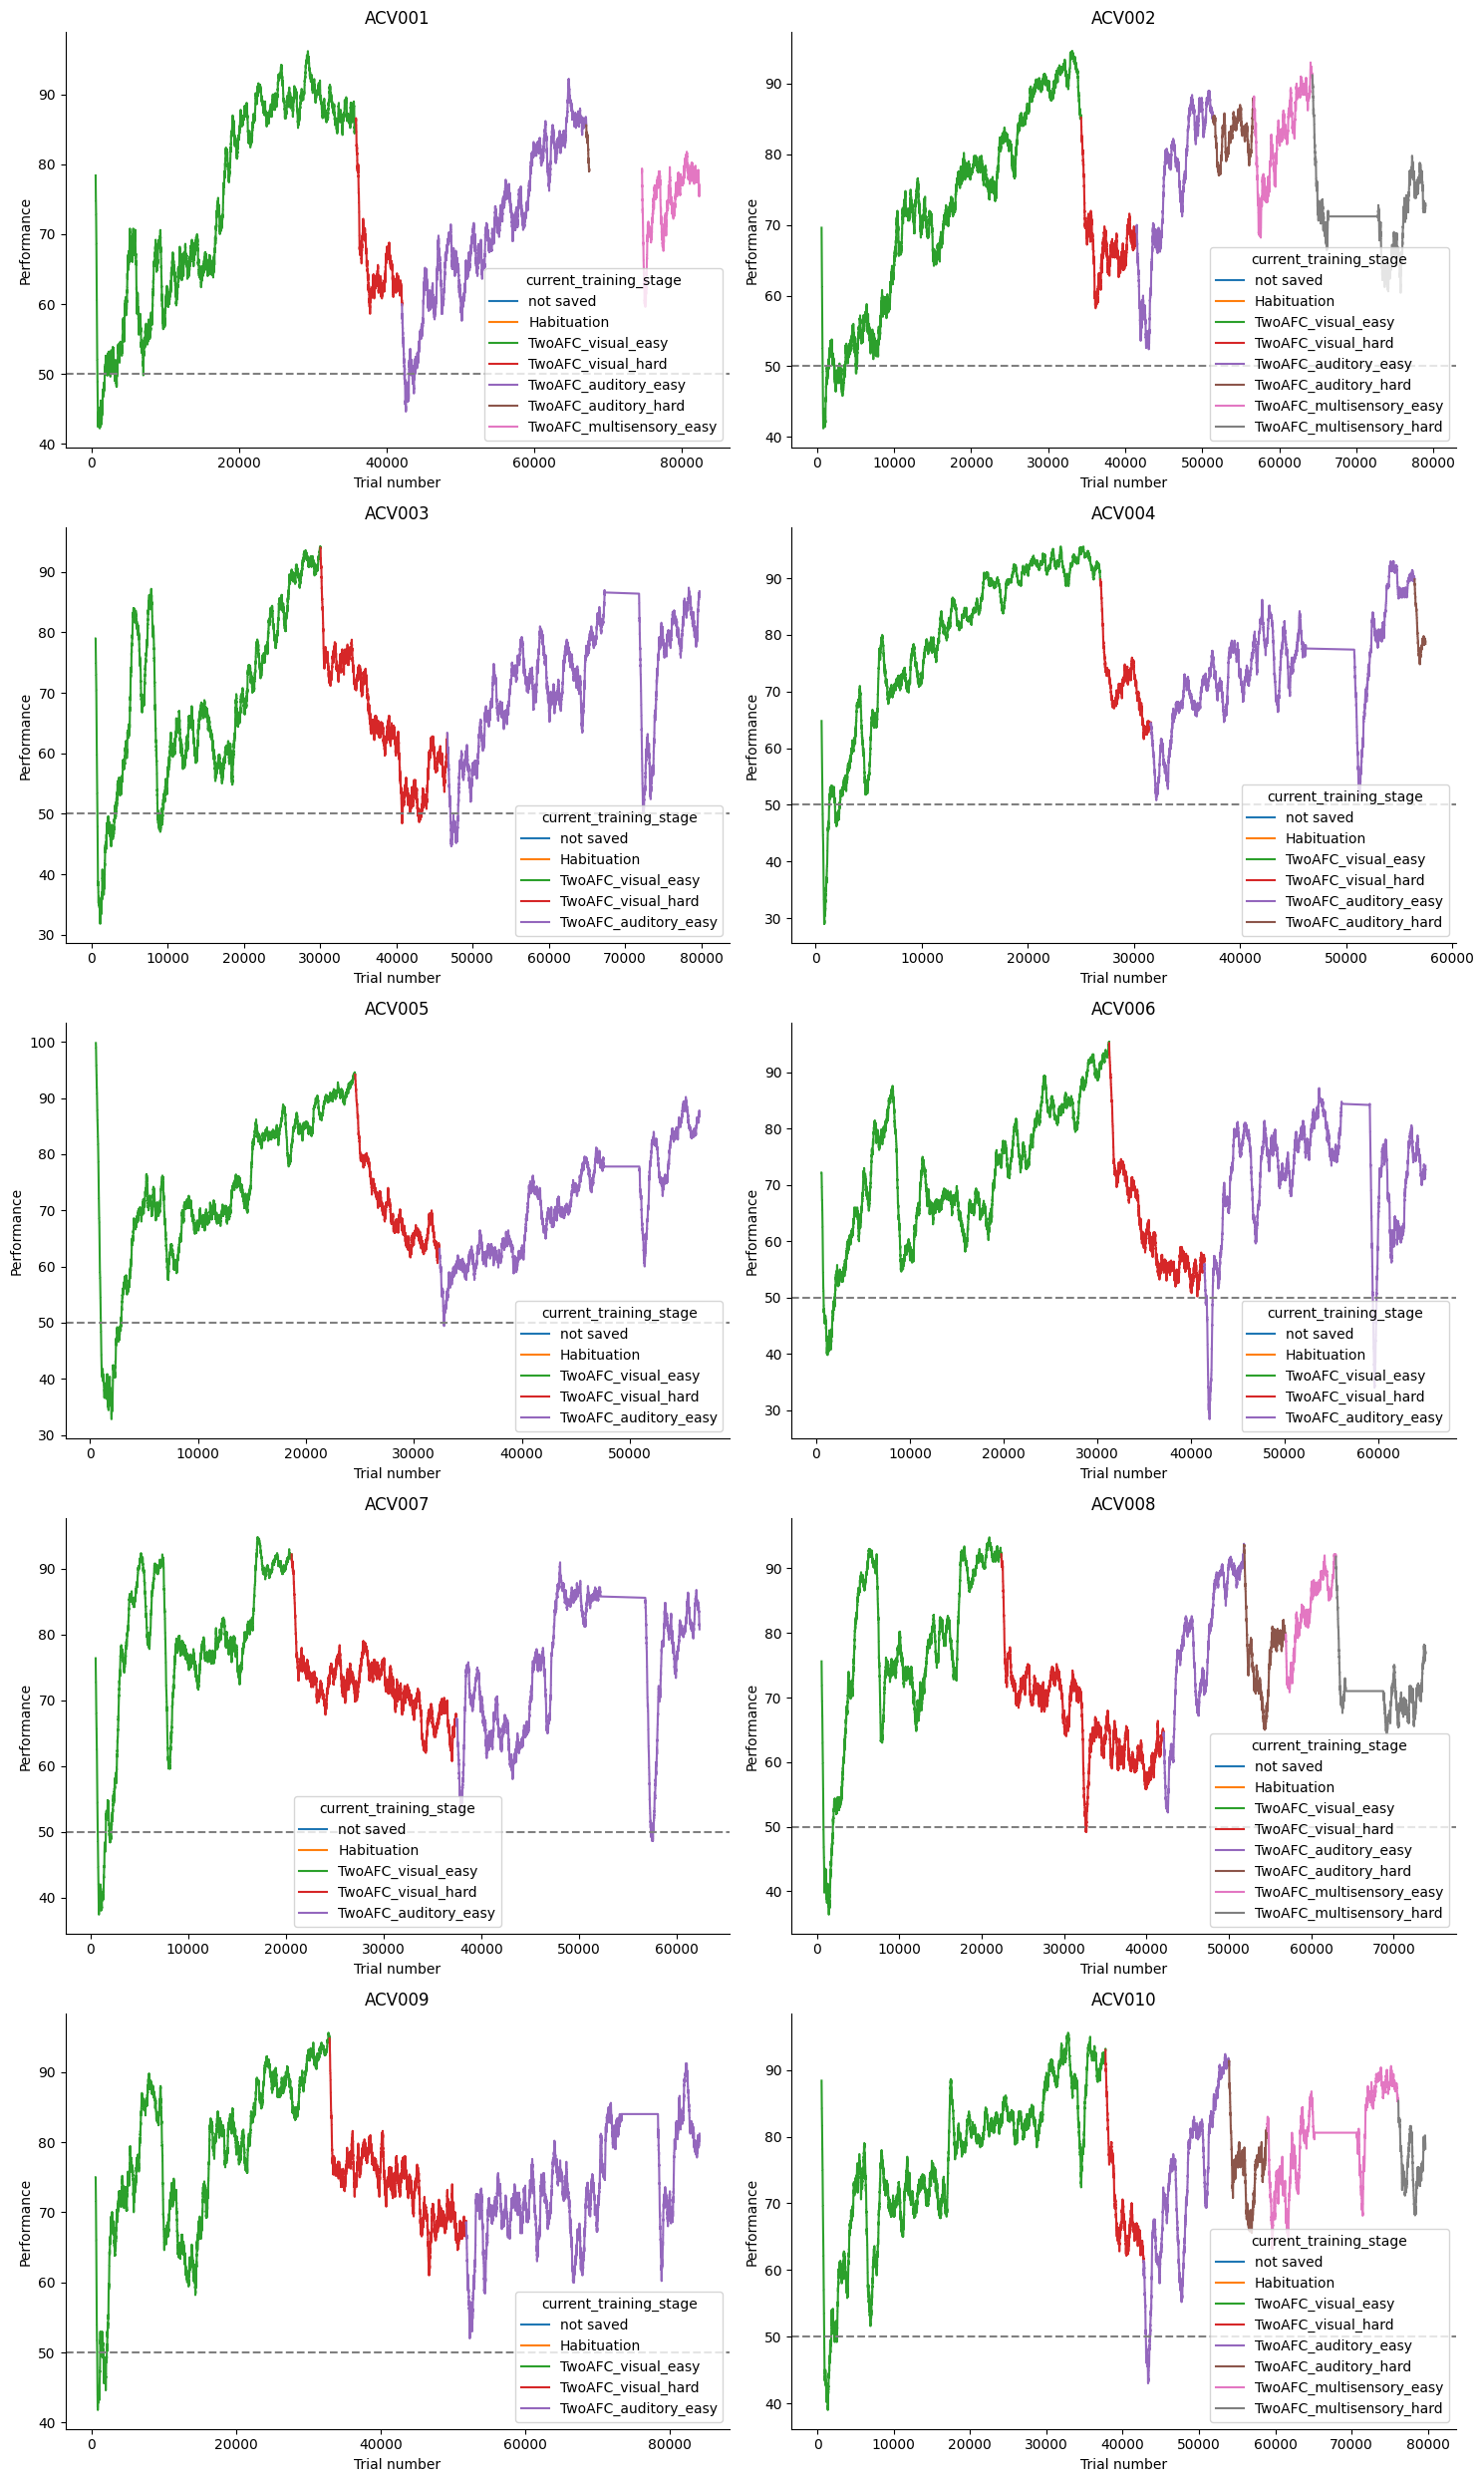

In [10]:
# plot the performance for each animal by training stage
ncols = 2
nrows = int(np.ceil(len(df_clean.subject.unique()) / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axs = axs.ravel()
window = 500  # number of trials to consider for the performance calculation
for i, subject in enumerate(df_clean.subject.unique()):
    ax_perf = axs[i]
    df_subj = df_clean[df_clean['subject'] == subject]
    # get the performance through trials
    df_subj = dft.get_performance_through_trials(df_subj, window=window)
    ax_perf = plots.performance_vs_trials_plot(df_subj, ax=ax_perf, legend=True)
    ax_perf.set_title(f"{subject}")
    ax_perf.set_xlabel('Trial number')
    ax_perf.set_ylabel('Performance')

# remove the empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

In [6]:
# select only the first 5000 trials of visual hard
vis_hard_df_list = []
for subject in df_clean.subject.unique():
    df_subj = df_clean[(df_clean['subject'] == subject) & (df_clean['current_training_stage'] == 'TwoAFC_visual_hard')]
    if len(df_subj) > 5000:
        df_subj = df_subj.iloc[:5000]
    vis_hard_df_list.append(df_subj)

vis_hard_df = pd.concat(vis_hard_df_list, ignore_index=True)

In [7]:
# save to a csv file
df_to_save = vis_hard_df.groupby(["subject", "difficulty"]).agg({
    "correct": "mean"}).reset_index()

df_to_save.to_csv("figures/visual_discrimination_performance.csv", index=False)

<Axes: xlabel='difficulty', ylabel='correct'>

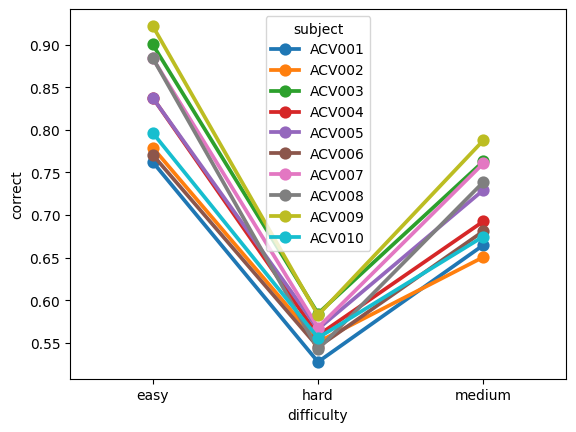

In [21]:
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')

<Axes: xlabel='difficulty', ylabel='correct'>

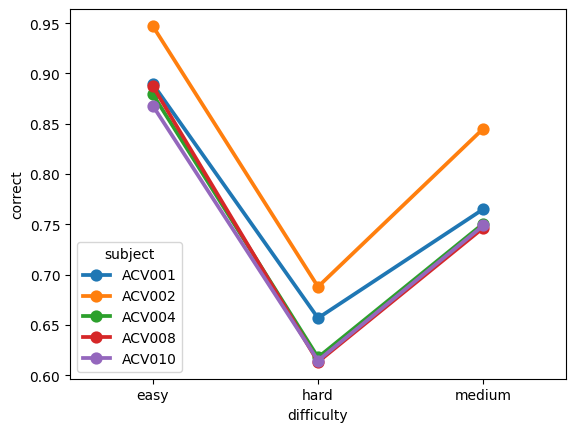

In [8]:
# do the same for the auditory
aud_hard_df = df_clean[df_clean['current_training_stage'] == 'TwoAFC_auditory_hard']
df_to_save = aud_hard_df.groupby(["subject", "difficulty"]).agg({
    "correct": "mean"}).reset_index()
df_to_save.to_csv("figures/auditory_discrimination_performance.csv", index=False)
sns.pointplot(data=df_to_save, x='difficulty', y='correct', hue='subject', errorbar='sd')

Generate the dfs with the trial duration, and those that are engaged or not engaged.

In [10]:
# add trial duration to the dataframes
vis_hard_df = dft.add_trial_duration_column_to_df(vis_hard_df)
aud_hard_df = dft.add_trial_duration_column_to_df(aud_hard_df)

In [32]:
# the session duration needs to be computed from the events, not from the sessions_summary_df
# load all the past events data
local_path = Path(utils.get_outpath()) / Path(tv_projects[1])
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="old_events",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="events.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)

receiving incremental file list
old_events/
old_events/events_20250313_112711.csv
old_events/events_20250326_193027.csv
old_events/events_20250510_133014.csv
old_events/events_20250602_014911.csv
old_events/events_20250702_202516.csv

sent 47,109 bytes  received 418 bytes  13,579.14 bytes/sec
total size is 12,879,798  speedup is 271.00
receiving incremental file list
events.csv

sent 43 bytes  received 201,878 bytes  134,614.00 bytes/sec
total size is 2,062,831  speedup is 10.22


True

In [81]:
events_df = utils.load_all_events(project_name=tv_projects[1])

In [86]:
# select a dataframe to run the engagement analysis on
modality = 'auditory'
df2afc = aud_hard_df.copy()

In [87]:
# find the end events for all the dates in df2afc using apply method
session_duration_df = df2afc.groupby('date')['subject'].first().reset_index(drop=False)
session_duration_df["end_of_session_result_search"]= session_duration_df.apply(lambda x: utils.find_next_end_task_time_in_events(events_df, x['date'], x['subject']), axis=1)

session_duration_df["end_of_task"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[0])
session_duration_df["duration"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[1])
# drop end_of_session_result_search
session_duration_df.drop(columns=["end_of_session_result_search"], inplace=True)

# replace any None entry by a nan
session_duration_df.replace({None: np.nan}, inplace=True)
# drop nans
session_duration_df.dropna(inplace=True)


In [88]:
engagement_sd_criteria = 2
td_vals_dict = {
    'subject': [],
    'median_td_log': [],
    'std_td_log': [],
}
for subject in df2afc['subject'].unique():
    df_mouse = df2afc[df2afc['subject'] == subject]
    # get the median and std of the log of the trial_duration
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    median_td_log = df_mouse['td_log'].median()
    std_td_log = df_mouse['td_log'].std()

    # store the median and std in the td_vals_dict
    td_vals_dict['subject'].append(subject)
    td_vals_dict['median_td_log'].append(median_td_log)
    td_vals_dict['std_td_log'].append(std_td_log)

    # classify trials as engaged or not engaged depending on the td_log
    df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)

    df2afc.loc[df2afc['subject'] == subject, 'engaged'] = df_mouse['engaged']

/tmp/ipykernel_47555/306053702.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_47555/306053702.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)
/tmp/ipykernel_47555/306053702.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [89]:
td_vals_df = pd.DataFrame(td_vals_dict)
gsbu_dfs = []
for date in df2afc['date'].unique():
    if date not in session_duration_df['date'].values:
        print(f"Date {date} not found in session_duration_df. Skipping.")
        continue
    df_session = df2afc[df2afc['date'] == date]
    gsbu_dfs.append(utils.get_session_box_usage(df_session, session_duration_df= session_duration_df))
gsbu_df = pd.concat(gsbu_dfs, ignore_index=True)

In [91]:
# get the mean by subject
gsbu_df_mean = gsbu_df.groupby(['subject', 'time_type']).aggregate({
    'percentage_of_time': 'mean',
}).reset_index()

In [92]:
# save the dataframes to a csv file
gsbu_df_mean.to_csv(f"figures/box_usage_{modality}.csv", index=False)

In [93]:
df2afc[['subject', 'total_trial', 'trial_duration', 'engaged']].to_csv(f"figures/trial_duration_{modality}.csv", index=False)